# ML Project
## Vitalijs Smirnovs
### ID:#

In [1]:
# import neccessary modules
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import r2_score

#### Look at the data

In [2]:
#read in data
df = pd.read_csv('data.csv')
df


,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


In [3]:
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


The data has 2 vars and 500 rows. Speed ranges from o to 25, with a mean of 12.5, power ranges from 0 to 113.6 with a mean of 48.

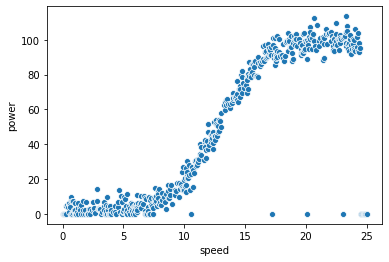

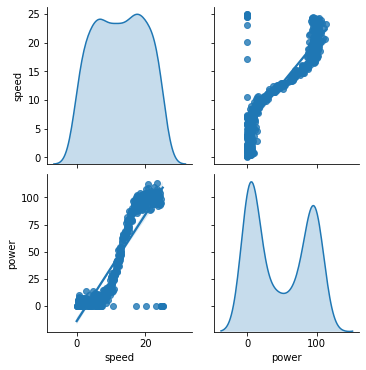

In [4]:
# https://seaborn.pydata.org/generated/seaborn.scatterplot.html

sns.scatterplot(data=df, x="speed", y="power")
sns.pairplot(df,diag_kind = "kde",kind="reg")
plt.show()

There is a distinct relationship between the two vars with a few values where at high speeds no data is generated. As it could be some unomaly in the functioning of the turbine, the obvervations need to be removed as they can distort the association that exist between the two vars.

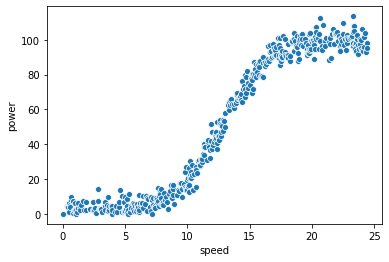

In [5]:
# drop the zero
df.drop(df[df.power == 0].index & df[df.speed>0].index, inplace=True)
# check it worked
# https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.scatterplot(data=df, x="speed", y="power")
plt.show()

I will try two models:
* Linear regression (LR)
* Random Forestsn (RF)
There are not that many ML algorythms that deal with continuous data. LR may not be the best algorythm but the dots lie very close to a straight line.

#### Linear Regression

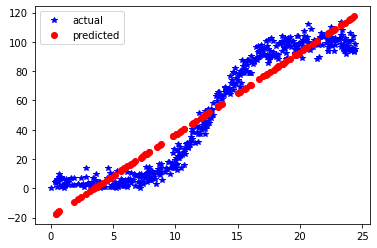

In [6]:
from sklearn.metrics import mean_squared_error, r2_score
X = df[['speed']].values                                                                                                
y = df['power'].values  

#adapted from https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)
# Create linear regression object
regr = LinearRegression(fit_intercept=True)
LR=regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

# Plot outputs
plt.plot(df['speed'], df['power'], 'b*', label="actual")  
plt.plot(X_test, y_pred, 'ro', label="predicted")   
plt.legend()
plt.show()

The LR model is fitting data more or less well. It has an R2 = 89%. Plotting the results can help to see hoe well values are predicted based on model estimates.

In [7]:
# Model evaluation (to asses accuracy):
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('R2:',metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 10.619770550087653
Mean Squared Error: 156.07499652154567
R2: 0.9086550915836638


In [8]:
#test predict
predX = [[20]]
LR.predict(predX)

array([92.93555902])

In [9]:
# adapted from https://www.geeksforgeeks.org/saving-a-machine-learning-model/
# save with pickle
import pickle 
  
# Save the trained model as a pickle string. 
pickle.dump(LR, open('LR.pkl', 'wb')) 
  
# Load the pickled model 
LR_pickle = pickle.load(open('LR.pkl', 'rb')) 
  
# Use the loaded pickled model to make predictions 
LR_pickle.predict(predX) 


array([92.93555902])

#### Random Forest

In [10]:
RF = RandomForestRegressor(n_estimators=50, criterion="mse")
RF_fitted = RF.fit(X_train, y_train)


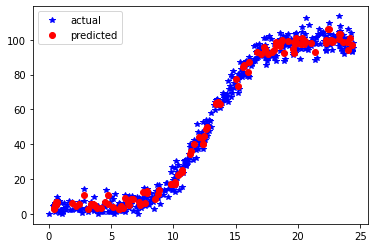

In [11]:
ypred = RF.predict(X_test)

# Plot outputs
plt.plot(df['speed'], df['power'], 'b*', label="actual")  
plt.plot(X_test, ypred, 'ro', label="predicted")   
plt.legend()
plt.show()

In [12]:
# Model evaluation (to asses accuracy):
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ypred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ypred))  
print('R2:',metrics.r2_score(y_test, ypred))

Mean Absolute Error: 3.573580530973454
Mean Squared Error: 19.460150790930996
R2: 0.9886106952978833


Random Forest model fits data very well with a coefficient od determination - R2 - 99%.

In [13]:
# Save the trained model as a pickle string. 
pickle.dump(RF, open('RF.pkl', 'wb')) 
  
# Load the pickled model 
RF_pickle = pickle.load(open('RF.pkl', 'rb')) 
  
# Use the loaded pickled model to make predictions 
RF_pickle.predict(predX) 

array([98.47892])